In [1]:
import numpy as np
import math

#Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

Task: Calculate the Bz and plot it into an image and include that image as
one of the images in a 3-frame (side by side) movie, where one image is continuum, one is the calculated Bz and the other is the inclination.

In [2]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [3]:
##from astropy.utils.data import get_pkg_data_filename
#from astropy.io import fits

##image_file = get_pkg_data_filename('/sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_blapp_index.fits')

Read the magnetic field data:
Is the below B_ANGLE =        7.19150301274 /    the inclination?


In [25]:
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
magfield.info()
magfield[1].header.keys

Filename: /Users/shirts/.astropy/cache/download/url/1bea07d76cbf5587379368cad7df7c6e/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1                1 ImageHDU        49   (120, 384)   float32   
  2                1 ImageHDU        49   (120, 384)   float32   
  3                1 ImageHDU        49   (120, 384)   float32   
  4                1 ImageHDU        49   (120, 384)   float32   
  5                1 ImageHDU        49   (120, 384)   float32   
  6                1 ImageHDU        49   (120, 384)   float32   
  7                1 ImageHDU        49   (120, 384)   float32   
  8                1 ImageHDU        49   (120, 384)   float32   
  9                1 ImageHDU        49   (120, 384)   float32   
 10                1 ImageHDU        49   (120, 384)   float32   
 11                1 ImageHDU        49   (120, 384)   float32   
 12                1 ImageHDU        49   (120, 384)   float32   
 

<bound method Header.keys of XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  120 /                                                
NAXIS2  =                  384 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
PROG_VER=                  463 /                                                
SEQN_VER=                  496 /                                                
PARM_VER=                  481 /                                                

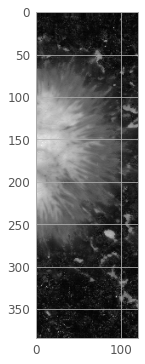

In [50]:
data_magfield = magfield[1].data
#print(data)
plt.imshow(data_magfield, cmap='gray')

In [17]:
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magincl.info()
magincl[1].header.keys

Filename: /Users/shirts/.astropy/cache/download/url/5a8b46f7e378df09ee8f4eafa394613f/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1                1 ImageHDU        49   (120, 384)   float32   
  2                1 ImageHDU        49   (120, 384)   float32   
  3                1 ImageHDU        49   (120, 384)   float32   
  4                1 ImageHDU        49   (120, 384)   float32   
  5                1 ImageHDU        49   (120, 384)   float32   
  6                1 ImageHDU        49   (120, 384)   float32   
  7                1 ImageHDU        49   (120, 384)   float32   
  8                1 ImageHDU        49   (120, 384)   float32   
  9                1 ImageHDU        49   (120, 384)   float32   
 10                1 ImageHDU        49   (120, 384)   float32   
 11                1 ImageHDU        49   (120, 384)   float32   
 12                1 ImageHDU        49   (120, 384)   float32   
 

<bound method Header.keys of XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  120 /                                                
NAXIS2  =                  384 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
PROG_VER=                  463 /                                                
SEQN_VER=                  496 /                                                
PARM_VER=                  481 /                                                

0.0


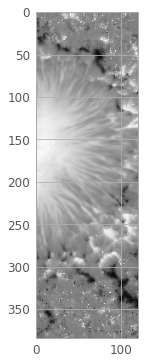

In [27]:
data_magincl = magincl[1].data
plt.imshow(data_magincl, cmap = 'gray')
print(np.min(data_magincl))

In [19]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
conti.info()
conti[0].header.keys

Filename: /Users/shirts/.astropy/cache/download/url/09a54919bcbe3207b8d4b846fb9f2d75/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1                1 ImageHDU        49   (120, 384)   float32   
  2                1 ImageHDU        49   (120, 384)   float32   
  3                1 ImageHDU        49   (120, 384)   float32   
  4                1 ImageHDU        49   (120, 384)   float32   
  5                1 ImageHDU        49   (120, 384)   float32   
  6                1 ImageHDU        49   (120, 384)   float32   
  7                1 ImageHDU        49   (120, 384)   float32   
  8                1 ImageHDU        49   (120, 384)   float32   
  9                1 ImageHDU        49   (120, 384)   float32   
 10                1 ImageHDU        49   (120, 384)   float32   
 11                1 ImageHDU        49   (120, 384)   float32   
 12                1 ImageHDU        49   (120, 384)   float32   
 

<bound method Header.keys of SIMPLE  =                    T / Written by IDL:  Tue Jul 31 18:20:13 2018      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    0 / Number of data axes                            
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2018-08-01'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
PROG_VER=                  463 /                                                
SEQN_VER=                  496 /                                                
PARM_VER=                  481 /                                                

(384, 120)

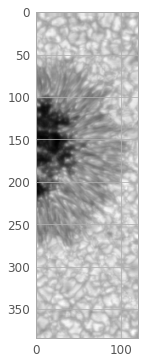

In [83]:
data_conti = conti[1].data
plt.imshow(data_conti, cmap = 'gray')
np.shape(data_conti)

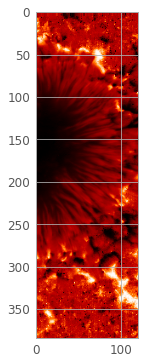

In [84]:
#print(data_magincl)
mag_incl_cos_rad=np.cos(np.array(np.deg2rad(data_magincl)))
plt.imshow(mag_incl_cos_rad)
#bz = magfield*(math.cos(data_magincl))

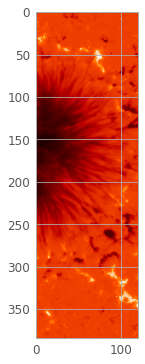

In [75]:
Bz =  data_magfield*mag_incl_cos_rad
plt.imshow(Bz)

[[  0   0]
 [200 600]]


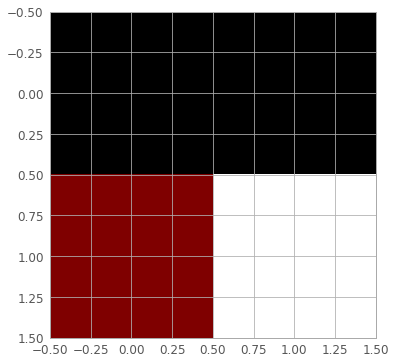

In [72]:
a1=np.array([[0,0],[200,30]])
a2= np.array([[0,0],[1,20]])
x=a1*a2
print(x)
plt.imshow(a1*a2)

In [79]:
from PIL import Image

In [88]:
img2 = Image.new("RGB", (384, 240), "white")
#img2.paste(data_conti, (0, 0))
img2.paste(Bz,(120,0))

ValueError: cannot determine region size; use 4-item box

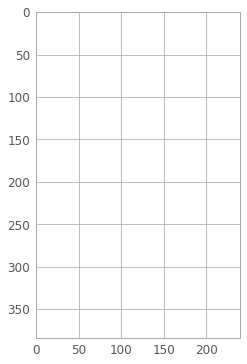

In [81]:
plt.imshow(img2)